### Decision Tree
Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

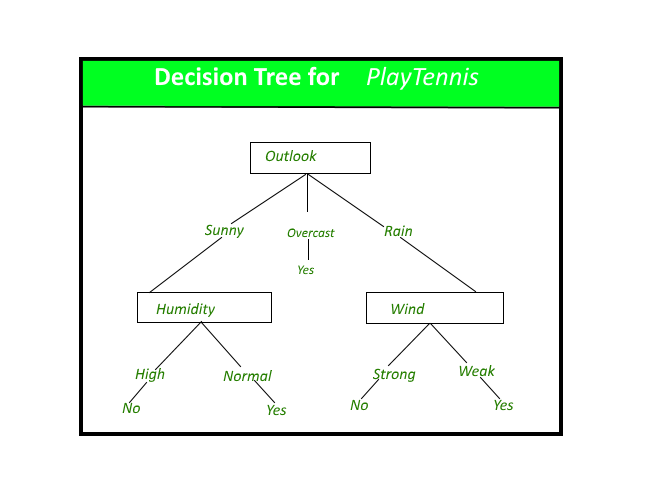

In [1]:
from IPython.display import Image, display;
display(Image(filename='d://Workhop_images/Decision_Tree.png'))

### Construction of Decision Tree 
A tree can be “learned” by splitting the source set into subsets based on an attribute value test. This process is repeated on each derived subset in a recursive manner called recursive partitioning. The recursion is completed when the subset at a node all has the same value of the target variable, or when splitting no longer adds value to the predictions. The construction of decision tree classifier does not require any domain knowledge or parameter setting, and therefore is appropriate for exploratory knowledge discovery. Decision trees can handle high dimensional data. In general decision tree classifier has good accuracy. Decision tree induction is a typical inductive approach to learn knowledge on classification

### Classification Using Decision Tree
Decision trees classify instances by sorting them down the tree from the root to some leaf node, which provides the classification of the instance. An instance is classified by starting at the root node of the tree,testing the attribute specified by this node,then moving down the tree branch corresponding to the value of the attribute as shown in the above figure.This process is then repeated for the subtree rooted at the new node.

In [2]:
from sklearn.cross_validation import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn import tree 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

import pandas as pd 
import numpy as np 

df = pd.read_csv('D://Workhop_images//Tennis.csv') 

lb = LabelEncoder() 
df['outlook_'] = lb.fit_transform(df['outlook']) 
df['temp_'] = lb.fit_transform(df['temp'] ) 
df['humidity_'] = lb.fit_transform(df['humidity'] ) 
df['windy_'] = lb.fit_transform(df['windy'] )   
df['play_'] = lb.fit_transform(df['play'] ) 
X = df.iloc[:,5:9] 
Y = df.iloc[:,9]
print(df)
X_train, X_test , Y_train,Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 54) 

#clf_entropy = DecisionTreeClassifier(criterion='gini')
#clf_entropy.fit(X_train,y_train) 
#y_pred_en = clf_entropy.predict(X_test)

#print("Accuracy is :{0}".format(accuracy_score(y_test,y_pred_en) * 100))
from sklearn.model_selection import GridSearchCV
params = {'criterion':['entropy','gini'],'max_depth': range(1,5,1)}   # max_depth:1,2,3,4

dtc = DecisionTreeClassifier(random_state=54)

model = GridSearchCV(dtc, params, cv=5)
model.fit(X_train,Y_train)
#print(model.best_params_)
best_clf = model.best_estimator_
best_clf.fit(X_train,Y_train)
y_pred_en = model.predict(X_test)

print("Accuracy is :{0}".format(accuracy_score(Y_test,y_pred_en) * 100))

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


     outlook  temp humidity  windy play  outlook_  temp_  humidity_  windy_  \
0      sunny   hot     high  False   no         2      1          0       0   
1      sunny   hot     high   True   no         2      1          0       1   
2   overcast   hot     high  False  yes         0      1          0       0   
3      rainy  mild     high  False  yes         1      2          0       0   
4      rainy  cool   normal  False  yes         1      0          1       0   
5      rainy  cool   normal   True   no         1      0          1       1   
6   overcast  cool   normal   True  yes         0      0          1       1   
7      sunny  mild     high  False   no         2      2          0       0   
8      sunny  cool   normal  False  yes         2      0          1       0   
9      rainy  mild   normal  False  yes         1      2          1       0   
10     sunny  mild   normal   True  yes         2      2          1       1   
11  overcast  mild     high   True  yes         0   

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


** sklearn DecisionTreeClassifier **

class sklearn.tree.DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)


In [3]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either estimator needs to provide a ``score`` function,
 |      or ``scoring`` must be passed.
 |  
 |  param_grid : dict or list of dictionaries
 |      Dictionary with parameters names (string) as ke

A hyperparameter is a parameter that defines the model, and must be chosen before the model sees any data (i.e. like alpha here it is set at initialization time). A normal model parameter, on the other hand, is free floating and set by fitting the model to data. One useful way to think about it is that hyperparameters define the model.

In machine learning, a hyperparameter is a parameter whose value is set before the learning process begins. By contrast, the values of other parameters are derived via training. 

Example :
Hyper-parameters are those which we supply to the model, for example: number of hidden Nodes and Layers,input features, Learning Rate, Activation Function etc in Neural Network, while Parameters are those which would be learned by the machine like Weights and Biases.
The support vectors in a support vector machine are also model parameters
The coefficients in a linear regression or logistic regression are model parameters

** Grid search is used to tune the hyper parameters of the model. **
* The inputs to the Grid Search are the hyper parameters to tune, the values to be used for each hyper parameter and performance metric
* Grid search constructs, evaluates and stores a model for every possible hyper parameter combination. It then returns the best score for the metric used and also the model built with the hyper parameter combination for which the best score is obtained.
* If we have given 'k' hyper parameters as input to grid search, then the grid could be perceived as having 'k' dimensions. The number values in ith dimension is equal to the number of values given for the ith hyper parameter in the input to grid search. A cell in grid indicates a combination of 'k' values corresponding to the 'k' hyper parameters given in the input. 
* So, for every combination of hyper parameters the performance of the model is evaluated. It then returns the model that is built with that hyper parameter combination that gives best score for the metric.
* For example if we consider K-Nearest Neighbor Classifier, optimum value for K i.e. number of nearest neighbors to use could be found using grid search. K=list(range(1,25))
p_grid=dict(n_neighbors=K)
grid_search = GridSearchCV(knn, p_grid, cv=5, scoring='accuracy')



import graphviz

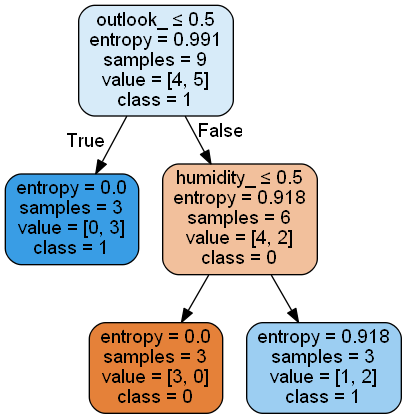

In [6]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
features = ["outlook_", "temp_", "humidity_", "windy_"]
#model.fit(X_train,Y_train)
dot_data = StringIO()
export_graphviz(best_clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tennis.png')
Image(graph.create_png())


In [6]:
print(type(graph))

<class 'pydotplus.graphviz.Dot'>


In [7]:
help(graph.write_png)

Help on function <lambda> in module pydotplus.graphviz:

<lambda> lambda path, f='png', prog='dot'
    Refer to the docstring accompanying the'write' method for more information.

